In [1]:
! pip install kaggle
! kaggle datasets download puneet6060/intel-image-classification
! unzip -n -d dataset intel-image-classification.zip

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  intel-image-classification.zip


# Imports

- numpy

In [2]:
! pip install numpy
! pip install pillow
! pip install matplotlib
! pip install scikit-learn

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']
['./dataset/seg_train/seg_train/forest/5109.jpg', './dataset/seg_train/seg_train/buildings/12536.jpg', './dataset/seg_train/seg_train/glacier/4217.jpg', './dataset/seg_train/seg_train/street/9733.jpg', './dataset/seg_train/seg_train/mountain/14147.jpg', './dataset/seg_train/seg_train/sea/6400.jpg']


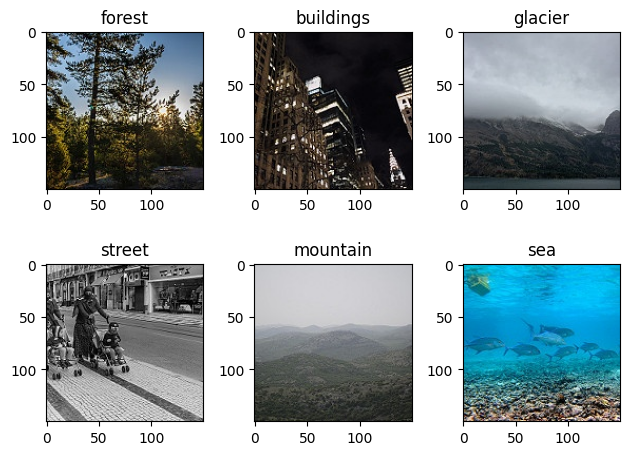

In [4]:
training_path = "./dataset/seg_train/seg_train"
subdirs = os.listdir(training_path)
print(subdirs)
images = [os.path.join(os.path.join("./dataset/seg_train/seg_train", dir), (os.listdir(os.path.join(training_path, dir))[0])) for dir in os.listdir(training_path)]
print(images)
images = [Image.open(image) for image in images]
fig, axs = plt.subplots(nrows=2, ncols=3)
for i, ax in enumerate(axs):
    for j, slot in enumerate(ax):
        slot.imshow(images[i*len(ax) + j])
        slot.set_title(f"{subdirs[i*len(ax) + j]}")
fig.tight_layout()
plt.show()

In [5]:
X_train_path = "./dataset/seg_train/seg_train/"
X_train_path_subdirectories = [os.path.join(X_train_path, subdirectory) for subdirectory in os.listdir(X_train_path)]
X_train_image_paths = [[os.path.join(dir, file) for file in os.listdir(dir)] for dir in X_train_path_subdirectories]
image_data_length = 150 * 150
X_train_valid_image_paths= []
for i in range(len(X_train_image_paths)):
    X_train_valid_image_paths += [file for file in X_train_image_paths[i] if np.array(Image.open(file).getdata()).shape[0] == image_data_length]

X_train_images = [np.array(Image.open(file).getdata()) for file in X_train_valid_image_paths]
X_train_images = np.concatenate(X_train_images)
X_train_images


array([[ 56,  47,   4],
       [ 69,  69,  43],
       [ 72,  90, 100],
       ...,
       [ 43,  42,  40],
       [ 51,  47,  46],
       [ 50,  46,  45]])

In [14]:
Y_train = [(os.path.dirname(file)) for file in X_train_valid_image_paths]
Y_train = np.array([file[file.rfind("/")+1:] for file in Y_train])
print(Y_train)

['forest' 'forest' 'forest' ... 'sea' 'sea' 'sea']


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_images)
X_train = scaler.transform(X_train_images)
X_train

array([[0.21960784, 0.18431373, 0.01568627],
       [0.27058824, 0.27058824, 0.16862745],
       [0.28235294, 0.35294118, 0.39215686],
       ...,
       [0.16862745, 0.16470588, 0.15686275],
       [0.2       , 0.18431373, 0.18039216],
       [0.19607843, 0.18039216, 0.17647059]])